# Abstract

The concept of eco-anxiety, characterized by ongoing concerns about the future of the Earth and its ecosystems, is increasingly acknowledged as a noteworthy psychological state. This condition holds particular relevance for children, as they are considered more susceptible to experiencing such anxieties given their developmental phase and perceived limited influence over environmental matters. However, many may lack the inherent familial support systems that help mitigate stressors, such as eco-anxiety, making them a particularly vulnerable group that requires dedicated study to understand and address their unique needs and challenges.
Thus, this study targets orphaned children, a group often overlooked in eco-anxiety research and lacking the traditional familial support mechanisms, to bridge the gap in understanding how alternative family-child bonding influences their experience of environmental concerns and the coping mechanisms for eco-anxiety. By examining the intersection of family-child bonds and the level of environmental awareness, the study could reveal tailored strategies for fostering resilience in orphaned children facing the dual challenges of environmental awareness and lack of traditional family structures.
This research proposal outlines a study designed to investigate the mitigating effects of family-child bonding on environmental awareness among children, with a focus on the potential moderating role of gender. Using a blend of qualitative and quantitative research methods in Deep Learning, the study aims to measure the correlation between the quality of family-child bonding and environmental awareness levels in children, thereby providing critical insights that could guide the development of targeted interventions for this at-risk population.

## Research Questions

The following research questions are suggested for each of the research objectives as highlighted as follows.
1.	What is the impact of alternative family-child bonding on levels of environmental awareness among orphaned children?
2.	Does gender correlate with the degree of environmental awareness by children?
3.	How can social workers tailor their interventions to effectively raise environmental awareness in orphaned children, and do these interventions differ based on gender?

## Assumptions of Linear Regression:

- The predicted values (family-child ponding) have linear relationship with the actual values (level of conciousness about climate change & gender).

- Independent and normally distribution of error terms with constant variance, zero mean.

- Multicollinearity: predictors are not correlated with each other.

## Aim and Objectives

The primary objective of this research is to deploy data science methodologies to quantify the impact of non-traditional family-child bonding interactions on environmental awareness in orphaned children. Additionally, the study aims to employ statistical analysis to uncover potential gender-based differences in environmental consciousness within this demographic. Through the utilization of regression models and possibly machine learning classifiers, the research seeks to identify and understand the patterns and predictors of environmental awareness, stratified by gender, in the context of varying familial bonds.
The research goals are derived from the purpose of this study, which can be summarized as follows:
•	Object 1: To measure the correlation between the quality of family-child bonding and the levels of environmental awareness in children with the help of data science techniques using correlation coefficients and regression analysis to examine the strength and nature of the relationship. Predictive modeling would be considered to analyze how family-child bonding scenarios impact environmental awareness, leveraging Random Forest for a more nuanced understanding of these complex interactions.
•	Object 2: To assess gender differences in environmental awareness among children using statistical methods such as t-tests or ANOVA with the employment of quantitative metrics, such as the percentage of environmental awareness in male versus female children, coupled with statistical analysis techniques like chi-square tests for categorical data or logistic regression for odds ratio assessments.
•	Object 3: To measure and rank gender-responsive intervention strategies for social workers based on their relative efficacy in increasing environmental awareness among children by applying techniques such as decision tree analysis to identify key factors that contribute to their success, thereby providing actionable insights for targeted gender-specific programming.

# Step 1: Reading and Understanding the Data

### Importing Relevant Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Understanding the dataset

In [2]:
#Read the dataset

survey = pd.read_excel('ChildrenDrawings_ChildrenQuestionnaires.xlsx')
survey.head()

,Participant number,Version,Age,Class,Gender,PREOE1,PREOE2,PREOE3,PREOE4,PREOE5,...,POSTCHECK16,NRCORRECTPRE,NRCORRECTPOST,LG,AVPREPE,AVPOSTOE,OEPoESPRE,OEPoESPOST,OEPoESDiff,OEPoESGain
0,1,1,11.0,MYP1,Boy,5.0,4.0,4.0,4.0,4.0,...,1,6,11,0.500000,3.538462,3.846154,4.000000,4.1250,0.125000,0.125
1,2,1,11.0,MYP1,Boy,4.0,5.0,4.0,3.0,5.0,...,0,6,11,0.500000,4.153846,3.923077,4.375000,4.2500,-0.125000,-0.200
2,3,1,12.0,MYP1,NaN,5.0,4.0,3.0,3.0,2.0,...,1,9,13,0.571429,3.000000,3.250000,3.000000,3.2500,0.250000,0.125
3,4,1,12.0,MYP1,Boy,4.0,2.0,5.0,3.5,3.0,...,1,9,10,0.142857,3.576923,3.653846,3.437500,3.8125,0.375000,0.240
4,5,2,12.0,MYP1,Girl,5.0,5.0,5.0,5.0,4.0,...,0,7,12,0.555556,4.363636,4.153846,4.857143,4.6250,-0.232143,-1.625


In [3]:
#Filter Boy

survey = survey[survey['Gender'] == 'Boy']

In [4]:
#Determining the number of rows and columns

survey.shape

(47, 108)

In [5]:
#Summary of all the numeric columns

survey.describe()

,Participant number,Version,Age,PREOE1,PREOE2,PREOE3,PREOE4,PREOE5,PREOE6,PREOE7,...,POSTCHECK16,NRCORRECTPRE,NRCORRECTPOST,LG,AVPREPE,AVPOSTOE,OEPoESPRE,OEPoESPOST,OEPoESDiff,OEPoESGain
count,47.000000,47.000000,47.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,50.276596,1.595745,11.340426,3.869565,3.869565,4.086957,3.815217,4.130435,4.347826,4.108696,...,0.489362,7.978723,9.808511,0.158930,3.852564,4.009956,3.985372,4.267287,0.281915,0.230923
std,29.964981,0.496053,0.599877,0.884652,1.066848,0.984910,0.709919,0.909425,0.947919,1.139752,...,0.505291,2.444954,1.996065,0.389958,0.394225,0.446218,0.551248,0.480373,0.431809,0.439858
min,1.000000,1.000000,10.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,4.000000,-1.250000,2.916667,2.846154,2.750000,3.000000,-0.875000,-1.000000
25%,25.500000,1.000000,11.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.250000,...,0.000000,6.000000,8.500000,0.000000,3.557692,3.730769,3.500000,4.000000,0.000000,0.000000
50%,46.000000,2.000000,11.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.500000,...,0.000000,8.000000,10.000000,0.200000,3.846154,4.000000,4.000000,4.250000,0.250000,0.285714
75%,76.000000,2.000000,12.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,1.000000,10.000000,11.000000,0.477273,4.153846,4.384615,4.375000,4.625000,0.437500,0.500000
max,99.000000,2.000000,12.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,12.000000,13.000000,0.666667,4.692308,4.846154,4.750000,5.000000,1.500000,1.000000


In [6]:
survey.head()

,Participant number,Version,Age,Class,Gender,PREOE1,PREOE2,PREOE3,PREOE4,PREOE5,...,POSTCHECK16,NRCORRECTPRE,NRCORRECTPOST,LG,AVPREPE,AVPOSTOE,OEPoESPRE,OEPoESPOST,OEPoESDiff,OEPoESGain
0,1,1,11.0,MYP1,Boy,5.0,4.0,4.0,4.0,4.0,...,1,6,11,0.500000,3.538462,3.846154,4.0000,4.1250,0.125,0.125000
1,2,1,11.0,MYP1,Boy,4.0,5.0,4.0,3.0,5.0,...,0,6,11,0.500000,4.153846,3.923077,4.3750,4.2500,-0.125,-0.200000
3,4,1,12.0,MYP1,Boy,4.0,2.0,5.0,3.5,3.0,...,1,9,10,0.142857,3.576923,3.653846,3.4375,3.8125,0.375,0.240000
7,8,1,12.0,MYP1,Boy,4.0,2.0,5.0,3.0,5.0,...,0,9,10,0.142857,3.923077,4.307692,4.1250,4.5000,0.375,0.428571
12,13,2,11.0,MYP1,Boy,3.0,4.0,5.0,4.0,5.0,...,0,8,9,0.125000,4.307692,4.538462,4.5000,4.7500,0.250,0.500000


In [7]:
#Datatypes of each column

survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 98
Columns: 108 entries, Participant number to OEPoESGain
dtypes: float64(29), int64(44), object(35)
memory usage: 40.0+ KB


In [8]:
#Checking missing values

survey.isnull().sum()

Participant number    0
Version               0
Age                   0
Class                 0
Gender                0
                     ..
AVPOSTOE              0
OEPoESPRE             0
OEPoESPOST            0
OEPoESDiff            0
OEPoESGain            0
Length: 108, dtype: int64

There is few missing values in our dataset.

In [9]:
#Dropping unnecessary columns

survey.drop(['Participant number','Version','Class','PREDRAW','PREKNOW1','PREKNOW2','PREKNOW3','PREKNOW4','PREKNOW5','PREKNOW6','PREKNOW7','PREKNOW8','PREKNOW9','PREKNOW10','PREKNOW11','PREKNOW12','PREKNOW13','PREKNOW14','PREKNOW15','PREKNOW16','TIME','SEAT','POSTDRAW','POSTOE1','POSTOE2','POSTOE3','POSTOE4','POSTOE5','POSTOE6','POSTOE7','POSTOE8','POSTOE9','POSTOE10','POSTOE11','POSTOE12','POSTOE13','POSTDRAW','POSTKNOW1','POSTKNOW2','POSTKNOW3','POSTKNOW4','POSTKNOW5','POSTKNOW6','POSTKNOW7','POSTKNOW8','POSTKNOW9','POSTKNOW10','POSTKNOW12','POSTKNOW13','POSTKNOW14','POSTKNOW15','POSTKNOW16','PRECHECK1','PRECHECK2','PRECHECK3','PRECHECK4','PRECHECK5','PRECHECK6','PRECHECK7','PRECHECK8','PRECHECK9','PRECHECK10','PRECHECK11','PRECHECK12','PRECHECK13','PRECHECK14','PRECHECK15','PRECHECK16','POSTCHECK1','POSTCHECK2','POSTCHECK3','POSTCHECK4','POSTCHECK5','POSTCHECK6','POSTCHECK7','POSTCHECK8','POSTCHECK9','POSTCHECK10','POSTCHECK11','POSTCHECK12','POSTCHECK13','POSTCHECK14','POSTCHECK15','POSTCHECK16','NRCORRECTPRE','NRCORRECTPOST','LG','AVPREPE','AVPOSTOE','OEPoESPRE','OEPoESPOST','OEPoESDiff','OEPoESGain'], axis=1, inplace=True)
survey.head()

,Age,Gender,PREOE1,PREOE2,PREOE3,PREOE4,PREOE5,PREOE6,PREOE7,PROE8,PREOE9,PREOE10,PREOE11,PREOE12,PREOE13,POSTNOW11
0,11.0,Boy,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,3.0,1,2.0,b
1,11.0,Boy,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,2,3.0,b
3,12.0,Boy,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,4.0,3.0,4,3.0,b
7,12.0,Boy,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4,1.0,b
12,11.0,Boy,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,b


In [10]:
#Renaming key the columns

survey.rename(columns = {'PREOE1':'view','PREOE2':'perspective','PREOE3':'value','PREOE4':'action','PREOE9':'bonding','PREOE10':'teamwork','POSTNOW11':'causes'}, inplace = True) 
survey.head()

,Age,Gender,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,teamwork,PREOE11,PREOE12,PREOE13,causes
0,11.0,Boy,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,3.0,1,2.0,b
1,11.0,Boy,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,2,3.0,b
3,12.0,Boy,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,4.0,3.0,4,3.0,b
7,12.0,Boy,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4,1.0,b
12,11.0,Boy,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,b


### Mapping the Labels

In [11]:
survey['causes'] = survey['causes'].astype(str)
survey['causes'] = survey.causes.map({'a': "people's activities", 'b': 'climate change', 'c': 'climate change', 'd': 'not aware'})

survey.head()

,Age,Gender,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,teamwork,PREOE11,PREOE12,PREOE13,causes
0,11.0,Boy,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,3.0,1,2.0,climate change
1,11.0,Boy,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,2,3.0,climate change
3,12.0,Boy,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,4.0,3.0,4,3.0,climate change
7,12.0,Boy,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4,1.0,climate change
12,11.0,Boy,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,climate change


# Step 2: Visualization

In [12]:
#Checking the unique values in the data

survey.nunique().sort_values()

Gender         1
Age            3
causes         3
perspective    4
action         4
PREOE5         4
PREOE6         4
PREOE7         4
bonding        4
view           5
value          5
PROE8          5
teamwork       5
PREOE12        5
PREOE13        5
PREOE11        6
dtype: int64

## I. Visualising Numeric Variables

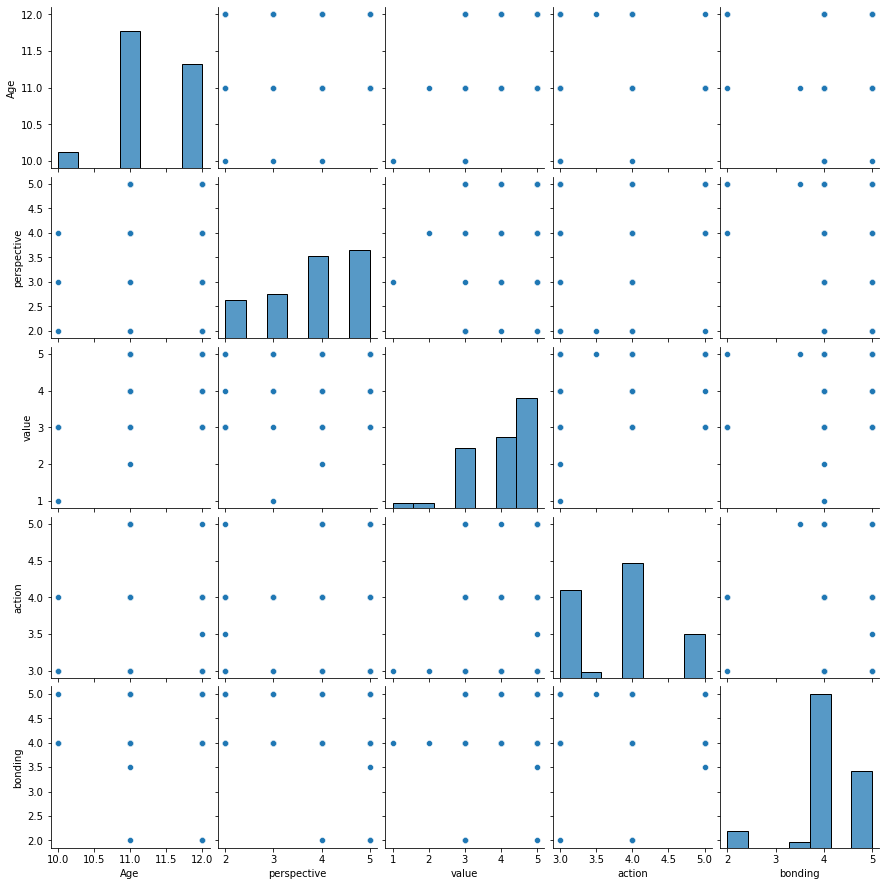

In [13]:
#Pairplot for numeric variables

sns.pairplot(survey, vars=['Age','perspective','value','action','bonding'])
plt.show()

## IV. Relations among variables

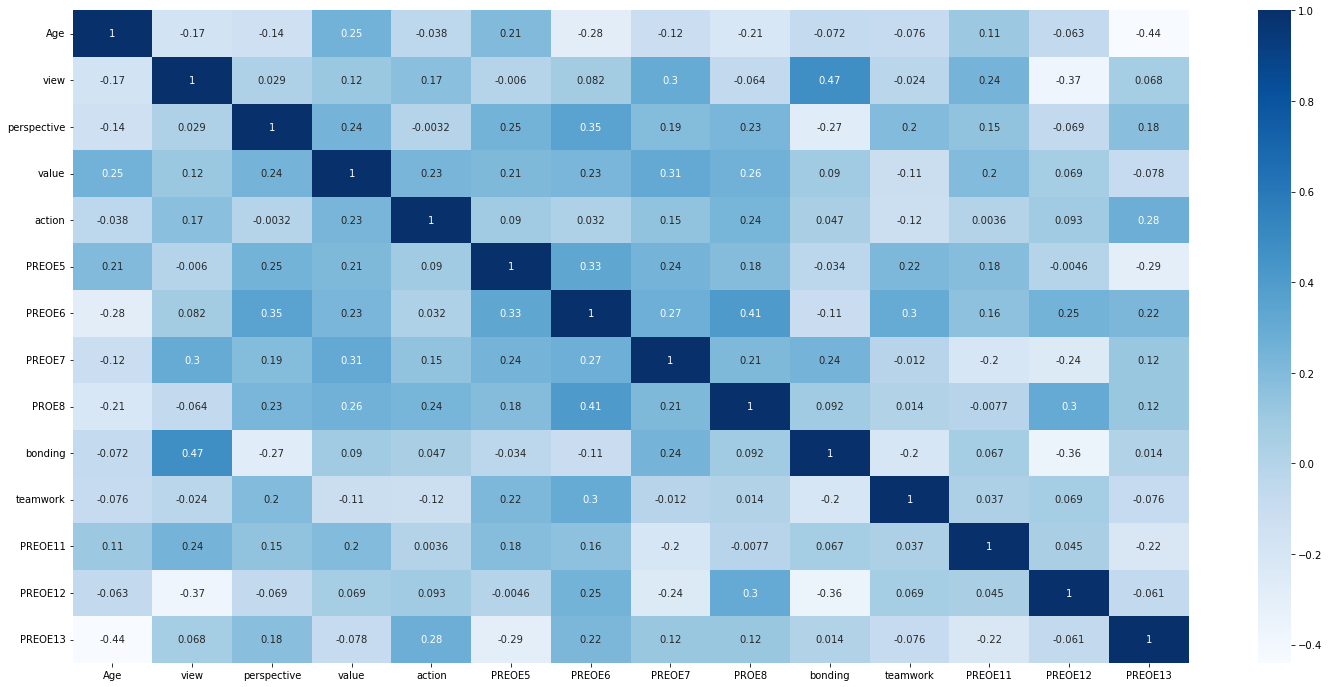

In [14]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 12))
sns.heatmap(survey.corr(), cmap='Blues', annot = True)
plt.show()

- We can see that 'view' and 'value' are correlated to the 'bonding' variable.
- We may also notice that some additional factors are highly correlated which is 'teamwork'.
- Both graphs above assist to analyze the data and indicate factors that may be relevant in creating the model.
- From this, we may construct a Linear Regression Model.

The dataset contains certain variables that are not necessary. Thus, we can drop them.

It has been discovered that 'teamwork' and 'bonding' are highly correlated, and 'teamwork' can be eliminated to minimize multicollinearity.

In [15]:
#Dropping unnecessary columns

survey.drop(['Age', 'teamwork'], axis=1, inplace=True)
survey.head()

,Gender,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,causes
0,Boy,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,1,2.0,climate change
1,Boy,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,2,3.0,climate change
3,Boy,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,3.0,4,3.0,climate change
7,Boy,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4,1.0,climate change
12,Boy,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,climate change


In [16]:
#Checking datatypes of all the columns
survey.dtypes

Gender          object
view           float64
perspective    float64
value          float64
action         float64
PREOE5         float64
PREOE6         float64
PREOE7         float64
PROE8          float64
bonding        float64
PREOE11        float64
PREOE12          int64
PREOE13        float64
causes          object
dtype: object

# Step 3: Data Preparation

In [17]:
#Creating Dummy variables for causes and Gender

causes = pd.get_dummies(survey['causes'], prefix='cause', drop_first=True)
Gender = pd.get_dummies(survey['Gender'], prefix='gender', drop_first=True)

# Combining the results to the original dataframe

survey = pd.concat([survey, causes, Gender], axis=1)
survey.head()

,Gender,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,causes,cause_not aware,cause_people's activities
0,Boy,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,1,2.0,climate change,0,0
1,Boy,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,2,3.0,climate change,0,0
3,Boy,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,3.0,4,3.0,climate change,0,0
7,Boy,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4,1.0,climate change,0,0
12,Boy,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,climate change,0,0


In [18]:
#Dropping the categorical variables as they are already dummy-encoded

survey.drop(['Gender','causes'], axis = 1, inplace = True)
survey.head()

,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,cause_not aware,cause_people's activities
0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,5.0,3.0,1,2.0,0,0
1,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,2,3.0,0,0
3,4.0,2.0,5.0,3.5,3.0,4.0,3.0,3.0,5.0,3.0,4,3.0,0,0
7,4.0,2.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4,1.0,0,0
12,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,3,5.0,0,0


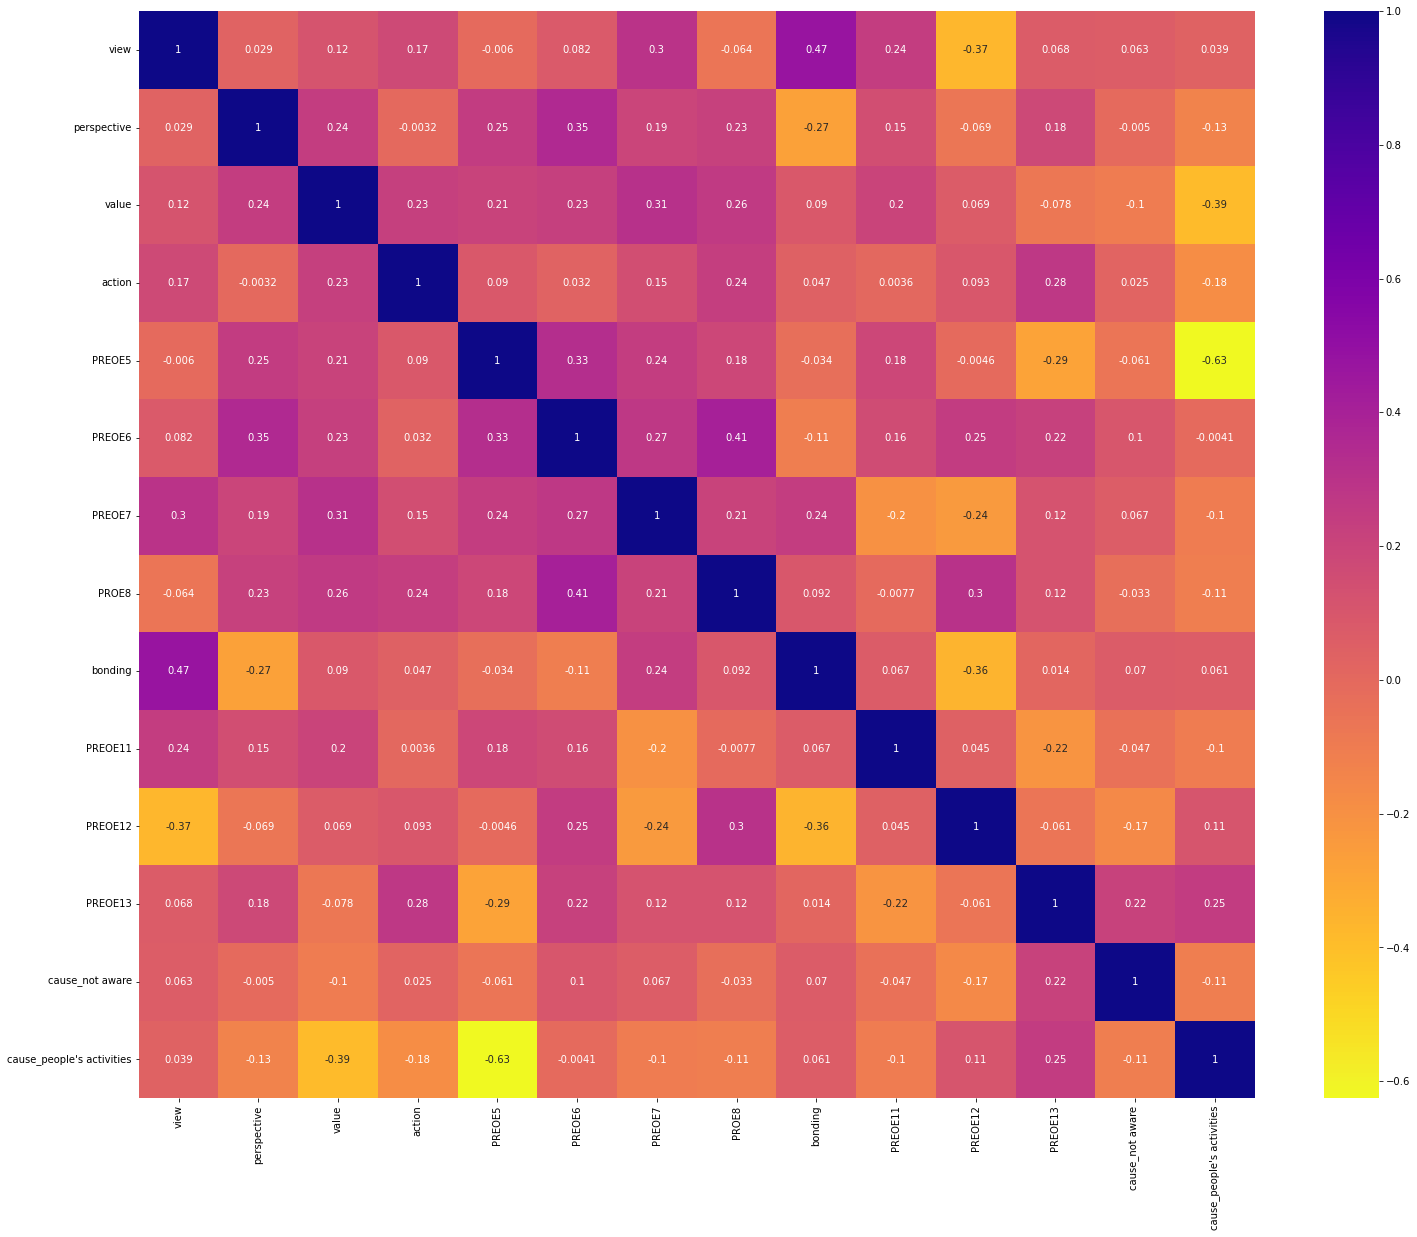

In [19]:
#Lets use Heatmap to check the correlation between variables at this point

plt.figure(figsize=(25, 20))
sns.heatmap(survey.corr(), cmap='plasma_r', annot = True)
plt.show()

# Step 4: Splitting the Data into Training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
survey_train, survey_test = train_test_split(survey, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

For the model to be easily interpretable, all variables must be on the same scale. We can use standardization or normalizing to ensure that the units of the computed coefficients are all on the same scale.

- Min-Max scaling (Normalisation): Between 0 and 1

- Standardisation: mean-0, sigma-1

The benefit of Standardisation over Min-Max scaling is that it does not compress the data between a specific range. This is helpful, especially if there is an outlier data point. Because our dataset does not contain significant outliers, I'll use Normalisation.

In [21]:
#importing the library

from sklearn.preprocessing import MinMaxScaler

In [22]:
#Instantiate an object
scaler = MinMaxScaler()

#Creating a list of numeric variables
num_vars = ['view','perspective','value','action','PREOE5','PREOE6','PREOE7','PROE8','bonding','PREOE11','PREOE12','PREOE13']

#Fit on data
survey_train[num_vars] = scaler.fit_transform(survey_train[num_vars])
survey_train.head()

,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,cause_not aware,cause_people's activities
17,0.75,0.666667,1.000000,0.5,0.666667,1.0,1.00,0.75,0.666667,0.666667,0.50,0.50,0,0
96,1.00,0.666667,1.000000,0.5,0.333333,1.0,0.75,0.50,0.666667,0.500000,0.50,1.00,0,0
35,0.75,1.000000,0.333333,0.0,1.000000,1.0,0.00,0.75,0.666667,1.000000,0.75,0.25,0,0
52,0.50,1.000000,1.000000,1.0,0.666667,1.0,1.00,1.00,0.666667,0.333333,1.00,1.00,0,0
38,0.75,1.000000,1.000000,1.0,1.000000,1.0,0.75,1.00,1.000000,0.666667,0.25,0.75,0,0


In [23]:
#Check for missing values again

missing_values = survey_train[num_vars].isnull().sum()
print('Missing Values:\n', missing_values)

Missing Values:
 view           1
perspective    1
value          1
action         1
PREOE5         1
PREOE6         1
PREOE7         1
PROE8          0
bonding        1
PREOE11        0
PREOE12        0
PREOE13        0
dtype: int64


In [24]:
# Fill missing values with mean
survey_train[num_vars] = survey_train[num_vars].fillna(survey_train[num_vars].mean())

In [25]:
#Checking numeric variables after scaling
survey_train.describe()

,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,cause_not aware,cause_people's activities
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.685484,0.612903,0.741935,0.362903,0.720430,0.817204,0.766129,0.703125,0.747312,0.447917,0.453125,0.648438,0.125000,0.031250
std,0.200481,0.360175,0.289725,0.335042,0.269032,0.278742,0.283523,0.313908,0.211120,0.204946,0.249495,0.268354,0.336011,0.176777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.333333,0.666667,0.000000,0.666667,0.666667,0.500000,0.500000,0.666667,0.333333,0.250000,0.500000,0.000000,0.000000
50%,0.750000,0.666667,0.704301,0.500000,0.666667,1.000000,0.758065,0.750000,0.666667,0.333333,0.500000,0.750000,0.000000,0.000000
75%,0.750000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.500000,0.750000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All of our numeric variables are mapped between 0 and 1.

Let's test our assumption on multicollinearity that predictors are not correlated with each other.

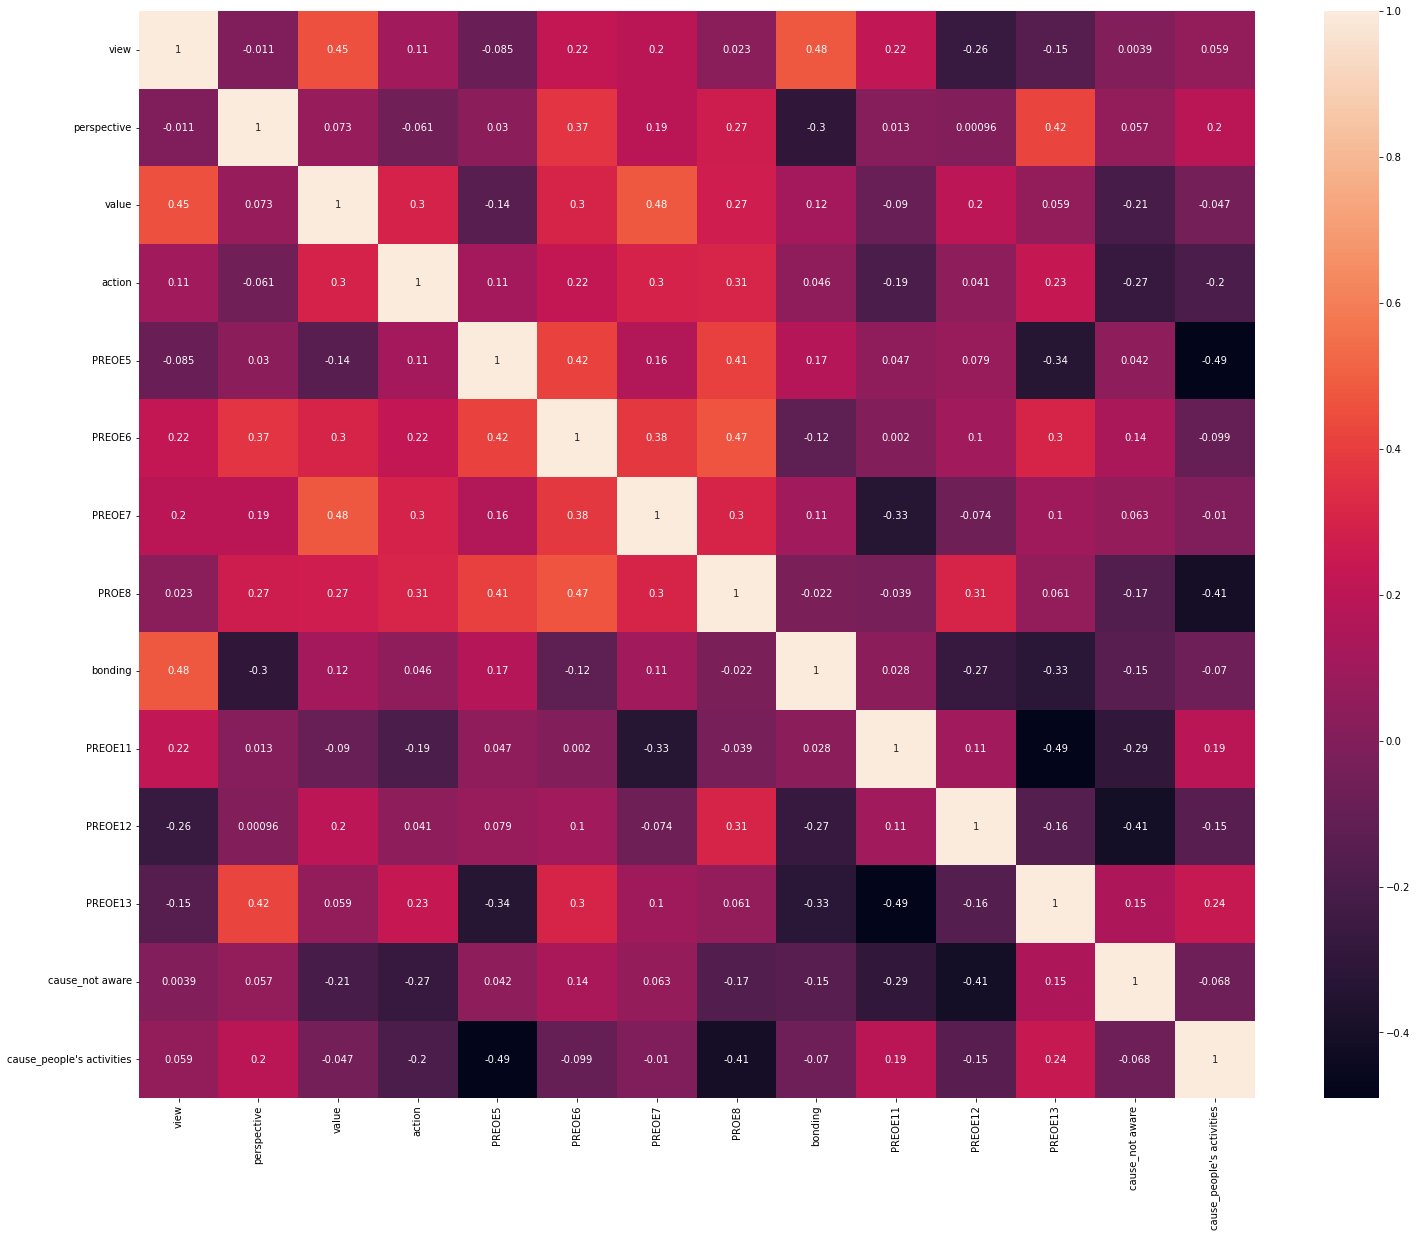

In [26]:
#Checking correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(25, 20))
sns.heatmap(survey_train.corr(), annot = True)
plt.show()

We notice that 'view' are correlated to the 'bonding' variable, so our assumption holds.
There are other factors that correlated to 'bonding'; however, they are not relevant in our research. Thus, we can ignore them.

## Dividing into X and Y sets for the model building

In [27]:
y_train = survey_train.pop('view')
x_train = survey_train

# Step 5: Building a linear model

We will use the SciKit Learn LinearRegression function for its compatibility with RFE (Recursive Feature Elimination - a utility from sklearn).

In [28]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, step = 10)
rfe = rfe.fit(x_train, y_train)

In [30]:
#List of variables selected

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('perspective', False, 2),
 ('value', True, 1),
 ('action', False, 2),
 ('PREOE5', True, 1),
 ('PREOE6', True, 1),
 ('PREOE7', False, 2),
 ('PROE8', False, 2),
 ('bonding', True, 1),
 ('PREOE11', False, 2),
 ('PREOE12', True, 1),
 ('PREOE13', True, 1),
 ('cause_not aware', False, 2),
 ("cause_people's activities", False, 2)]

In [31]:
#Columns where RFE support is True

col = x_train.columns[rfe.support_]
col

Index(['value', 'PREOE5', 'PREOE6', 'bonding', 'PREOE12', 'PREOE13'], dtype='object')

In [32]:
#Columns where RFE support is False

x_train.columns[~rfe.support_]

Index(['perspective', 'action', 'PREOE7', 'PROE8', 'PREOE11',
       'cause_not aware', 'cause_people's activities'],
      dtype='object')

## Building model using statsmodel

In [33]:
#Creating x_test dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [34]:
#Adding a constant variable

import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [35]:
#Running the linear model

lm = sm.OLS(y_train, x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     6.157
Date:                Sat, 18 May 2024   Prob (F-statistic):           0.000457
Time:                        14:39:21   Log-Likelihood:                 21.044
No. Observations:                  32   AIC:                            -28.09
Df Residuals:                      25   BIC:                            -17.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5202      0.192      2.712      0.0

- All of the variables have p-values less than 0.05, except value. Hence, we can drop it.

- Let's check VIFs before deciding whether to keep or drop these variables.

### Checking VIF

The Variance Inflation Factor (VIF) provides a simple quantitative estimate of how strongly the feature variables are associated with one another. It is a critical parameter for testing our linear model. VIF is calculated using the following formula:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [36]:
#Dropping the constant term B0

x_train_rfe = x_train_rfe.drop(['const'], axis=1)

In [37]:
#Calculating the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,PREOE6,21.37
1,PREOE5,14.70
3,bonding,11.60
0,value,10.92
5,PREOE13,7.31
4,PREOE12,4.49


As we can notice, variable value has VIF > 10 (insignificant variable), thus we can drop it.

#### Rebuilding the model without 'value'

In [38]:
#Dropping variables having VIF > 10

x_train_2 = x_train_rfe.drop(['value'], axis = 1)

In [39]:
#Building a model

x_train_lm2 = sm.add_constant(x_train_2)
lm2 = sm.OLS(y_train, x_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     6.224
Date:                Sat, 18 May 2024   Prob (F-statistic):           0.000640
Time:                        14:39:21   Log-Likelihood:                 19.120
No. Observations:                  32   AIC:                            -26.24
Df Residuals:                      26   BIC:                            -17.45
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5847      0.196      2.980      0.0

In [40]:
#Dropping the constant term B0

x_train_lm2 = x_train_lm2.drop(['const'], axis=1)

In [41]:
#Calculating the VIFs for the new model

vif = pd.DataFrame()
x = x_train_2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,PREOE6,16.94
0,PREOE5,12.59
2,bonding,8.23
4,PREOE13,7.31
3,PREOE12,3.85


As we can notice, value PREOE12 has p-value > 0.05, thus we can drop it.

#### Rebuilding the model without 'PREOE12'

In [42]:
#Dropping working_day

x_train_3 = x_train_lm2.drop(['PREOE12'], axis = 1)

In [43]:
#Building a model

x_train_lm3 = sm.add_constant(x_train_3)
lm3 = sm.OLS(y_train, x_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     6.641
Date:                Sat, 18 May 2024   Prob (F-statistic):           0.000741
Time:                        14:39:21   Log-Likelihood:                 17.488
No. Observations:                  32   AIC:                            -24.98
Df Residuals:                      27   BIC:                            -17.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4131      0.173      2.393      0.0

In [44]:
#Dropping the constant term B0

x_train_lm3 = x_train_lm3.drop(['const'], axis=1)

In [45]:
#Calculating the VIFs for the new model

vif = pd.DataFrame()
x = x_train_3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,PREOE6,16.35
0,PREOE5,12.23
2,bonding,8.18
3,PREOE13,7.28


As we can notice, variable 'PREOE6' has VIF > 10, thus we can drop it.

#### Rebuilding the model without 'PREOE6'

In [46]:
#Dropping PREOE6

x_train_4 = x_train_lm3.drop(['PREOE6'], axis = 1)

In [47]:
#Building a model

x_train_lm4 = sm.add_constant(x_train_4)
lm4 = sm.OLS(y_train, x_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.239
Date:                Sat, 18 May 2024   Prob (F-statistic):             0.0370
Time:                        14:39:21   Log-Likelihood:                 11.294
No. Observations:                  32   AIC:                            -14.59
Df Residuals:                      28   BIC:                            -8.725
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4668      0.205      2.278      0.0

In [48]:
#Dropping the constant term B0

x_train_lm4 = x_train_lm4.drop(['const'], axis=1)

In [49]:
#Calculating the VIFs for the new model

vif = pd.DataFrame()
x = x_train_4
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bonding,8.17
0,PREOE5,6.70
2,PREOE13,3.94


As we can notice, variable 'PREOE13' has p-value > 0.05, thus we can drop it.

#### Rebuilding the model without 'PREOE13'

In [50]:
#Dropping gender_Girl

x_train_5 = x_train_lm4.drop(['PREOE13'], axis = 1)

In [51]:
#Building a model

x_train_lm5 = sm.add_constant(x_train_5)
lm5 = sm.OLS(y_train, x_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.962
Date:                Sat, 18 May 2024   Prob (F-statistic):             0.0140
Time:                        14:39:21   Log-Likelihood:                 11.236
No. Observations:                  32   AIC:                            -16.47
Df Residuals:                      29   BIC:                            -12.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4186      0.136      3.074      0.0

In [52]:
#Dropping the constant term B0

x_train_lm5 = x_train_lm5.drop(['const'], axis=1)

In [53]:
#Calculating the VIFs for the new model

vif = pd.DataFrame()
x = x_train_5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,PREOE5,6.5
1,bonding,6.5


We will drop 'PREOE5' as it has p-value > 0.05.

#### Rebuilding the model without 'PREOE5'

In [54]:
#Dropping PREOE6

x_train_6 = x_train_lm5.drop(['PREOE5'], axis = 1)

In [55]:
#Building a model

x_train_lm6 = sm.add_constant(x_train_6)
lm6 = sm.OLS(y_train, x_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     8.798
Date:                Sat, 18 May 2024   Prob (F-statistic):            0.00587
Time:                        14:39:21   Log-Likelihood:                 10.642
No. Observations:                  32   AIC:                            -17.28
Df Residuals:                      30   BIC:                            -14.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3475      0.118      2.939      0.0

Model I:

The VIFs and p-values are both within acceptable limits. Hence, we proceed to generate predictions using this model.

- For each term, the p-value tests the null hypothesis that the coefficient is less than 0.05. A low p-value (< 0.05) suggests that the null hypothesis may be rejected.

- Generally, if a VIF is more than 10, we have strong multicollinearity. In our scenario, VIFs < 5 indicate that we are in good shape and may continue with our regression.

- R-squared is a handy 0 - 100% scale that assesses the strength of the association between our model and the dependent variable. And the R-square value is 0.227, or 22.7%.

- The adjusted R-squared accounts for the model's number of terms. And we got 0.201, or 20.1%.

# Step 6: Residual Analysis of the train data

Let's check our assumpitions of Linear Regression

In [56]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [57]:
#y train predicted

y_train_pred = lm.predict(x_train_rfe)

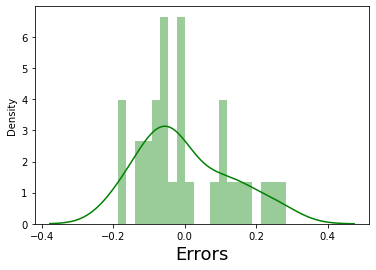

In [58]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20, color = 'green')
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are nearly normally distributed.

# Step 7: Making Predictions

### Applying the scaling on the test sets

In [59]:
#Create a list of numeric variables

num_vars = ['view','perspective','value','action','PREOE5','PREOE6','PREOE7','PROE8','bonding','PREOE11','PREOE12','PREOE13']

survey[num_vars] = survey[num_vars].fillna(survey[num_vars].mean())

#Fit on data

survey[num_vars] = scaler.transform(survey[num_vars])
survey.head()

,view,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,cause_not aware,cause_people's activities
0,1.00,0.666667,0.666667,0.50,0.666667,0.000000,1.0,0.75,1.0,0.333333,0.00,0.25,0,0
1,0.75,1.000000,0.666667,0.00,1.000000,1.000000,1.0,0.75,1.0,0.666667,0.25,0.50,0,0
3,0.75,0.000000,1.000000,0.25,0.333333,0.666667,0.5,0.50,1.0,0.333333,0.75,0.50,0,0
7,0.75,0.000000,1.000000,0.00,1.000000,0.666667,1.0,1.00,1.0,0.666667,0.75,0.00,0,0
12,0.50,0.666667,1.000000,0.50,1.000000,1.000000,1.0,1.00,1.0,0.000000,0.50,1.00,0,0


In [60]:
#Dividing into X_test and y_test

y_test = survey.pop('view')
x_test = survey
x_test.describe()

,perspective,value,action,PREOE5,PREOE6,PREOE7,PROE8,bonding,PREOE11,PREOE12,PREOE13,cause_not aware,cause_people's activities
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.623188,0.695652,0.407609,0.710145,0.782609,0.777174,0.702128,0.721014,0.432624,0.468085,0.632979,0.148936,0.063830
std,0.351729,0.324715,0.351080,0.299828,0.312520,0.281824,0.297810,0.245870,0.252187,0.283692,0.298780,0.359875,0.247092
min,0.000000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.000000,0.666667,0.666667,0.625000,0.500000,0.666667,0.333333,0.250000,0.500000,0.000000,0.000000
50%,0.666667,0.666667,0.500000,0.666667,1.000000,0.777174,0.750000,0.666667,0.333333,0.500000,0.750000,0.000000,0.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.625000,0.750000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
x_train_rfe = x_train_rfe.drop('const',axis=1)
x_train_rfe.columns

Index(['value', 'PREOE5', 'PREOE6', 'bonding', 'PREOE12', 'PREOE13'], dtype='object')

In [62]:
#Using our model to make predictions

# Creating x_test_new dataframe by dropping variables from x_test
x_test_new = x_test[x_train_rfe.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)
x_test_new.head()

,const,value,PREOE5,PREOE6,bonding,PREOE12,PREOE13
0,1.0,0.666667,0.666667,0.000000,1.0,0.00,0.25
1,1.0,0.666667,1.000000,1.000000,1.0,0.25,0.50
3,1.0,1.000000,0.333333,0.666667,1.0,0.75,0.50
7,1.0,1.000000,1.000000,0.666667,1.0,0.75,0.00
12,1.0,1.000000,1.000000,1.000000,1.0,0.50,1.00


In [63]:
#Making predictions

y_pred = lm.predict(x_test_new)

### Finding R-squared and Adjusted R-Squared for Test set

In [64]:
print('y_test shape:', y_test.shape)
print('y_pred shape:', y_pred.shape)

y_test shape: (47,)
y_pred shape: (47,)


In [65]:
#Evaluating R-square

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0003643311497505408

### Adjusted R^2

$ adj r2 = 1 - (1-R2)*\frac{N-1}{N-p-1} $

N is the sample size, meaning the number of rows we would have in the data set, and p is the number of predictor variables.

In [66]:
x_test_new.shape

(47, 7)

In [67]:
Adj_r2 = 1-(1-0.00036433)*(47-1)/(47-6-1)
print(Adj_r2)

-0.14958102049999988


# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

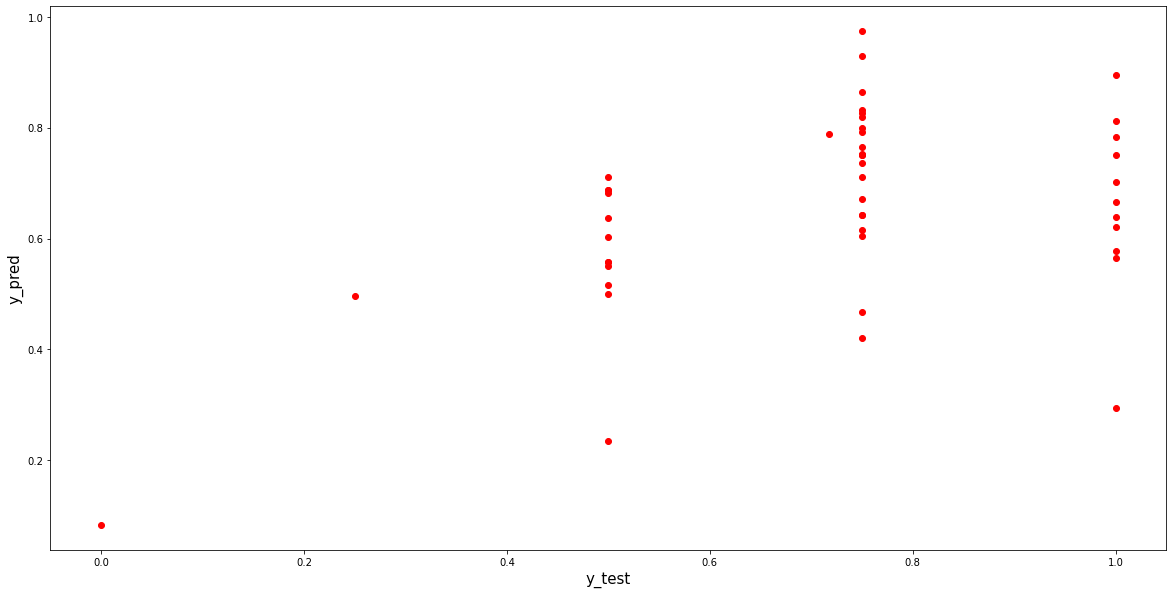

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color = 'Red')
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

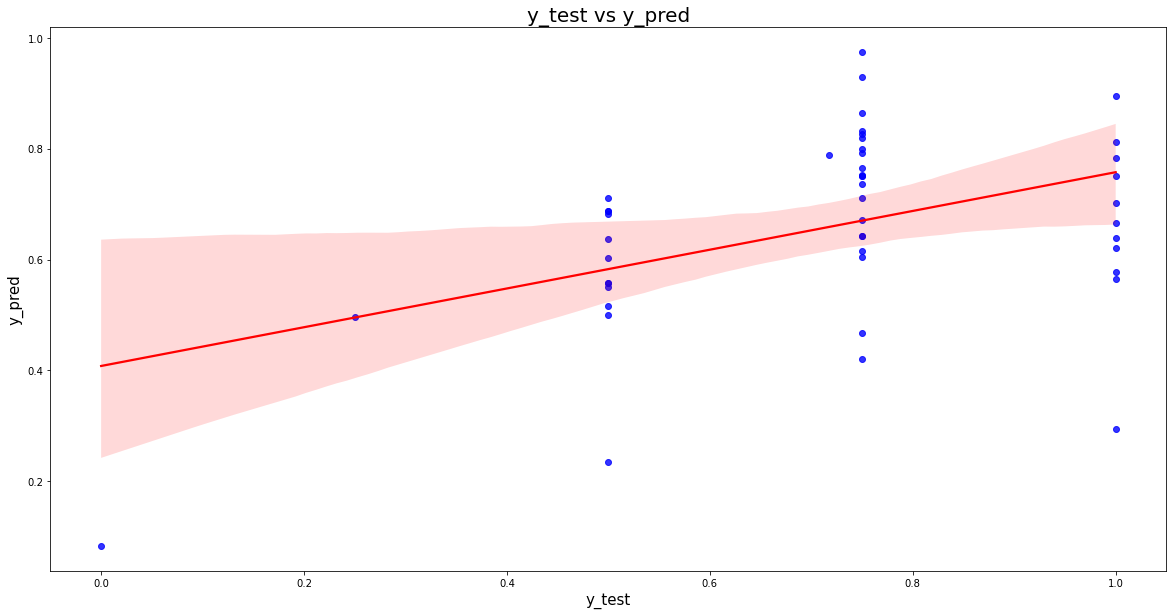

In [69]:
#Visualising the fit on the test set

#Regression plot

plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)
plt.show()

The equation of our best fitted line is:

view = 0.3475 + 0.4522*bonding

# Conclusion:

### Analysis on the problem:

The major variable influencing the 'view' is:

- Bonding: 0.4522

The coefficient value represents how much the dependent variable changes when the independent variable is changed by one unit while the other variables in the model remain constant.

- We can observe that the Bonding variable has the only positive largest coefficient (0.4522), which implies that an increase of family-child bonding by one unit increases the positive view of children on the earth/the environment by 0.4522 units.

### Analysis Comparison between Train model and Test:

- Train - R^2: 0.227
- Train - Adjusted R^2: 0.201
- Test - R^2: 0.00036433
- Test - Adjusted R^2: -0.149581
- Difference in R^2 between Train and Test: 22.66%
- Difference in adjusted R^2 between Train and Test: 35.06%

Our R-squared score is not really good, ranging outside of the range 70 and 90% and the difference between R^2 and adjusted R^2 among train and test fall above 5%.

### Analytical Goals:

- Bonding can be an important aspect in the perception of male children about the environment.

- The level of awareness is directly proportional to the level of their family-child bonding.

- However, the prediction mocel in this case is not reliable. More analysis are required.